In [1]:
%matplotlib inline
import numpy as np
import torch
from matplotlib import pyplot as plt
import random

# **生成数据集**

我们构建一个输入维度为2，有1000个样本的数据     
我们模拟的数据为：$y = w_1x_1 + w_2x_2 + b$的函数
为了接近时间情况我们加入噪声项$\epsilon \sim N(0,0.01)$   
$w_1 = 2, w_2=-3.4, b=4.2$

In [2]:
nums_input = 2
nums_example = 1000
true_w = [2, -3.4]
true_b = 4.2

In [3]:
# 生成tensor类型的数据
features = torch.tensor(np.random.normal(0, 1, (nums_example, nums_input)), dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b + torch.from_numpy(np.random.normal(0, 0.01, 1000))

In [4]:
print(labels[0], features[0])

tensor(5.2494, dtype=torch.float64) tensor([-0.0571, -0.3444])


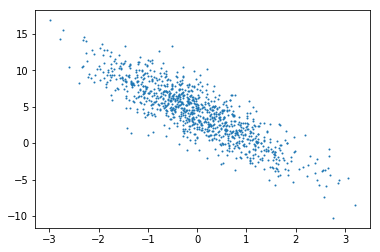

In [5]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

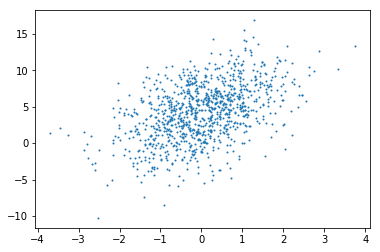

In [6]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)

# **读取数据**

In [7]:
import sys
sys.path.append(r'C:\D\ProgramFile\jupyter\torch_learn\dive_to_dp\utils')
from d2lzh import data_iter

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X.shape, y)
    break

torch.Size([10, 2]) tensor([ 5.4550,  7.4461, 10.8290,  4.9612,  7.9562,  5.5954,  5.0399, 12.8019,
         1.7829,  0.4630], dtype=torch.float64)


# **初始化模型参数**

In [9]:
w = torch.tensor(np.random.normal(0, 0.01, (nums_input, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype= torch.float32)

In [10]:
# 我们需要记录w和b的梯度值
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

# **定义模型**

In [11]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

# **定义损失**

In [12]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size()))**2 / 2

# **定义优化过程**

In [20]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

以上三个函数都卸载了d2lzh中

# **优化过程**

In [21]:
# 超参数
lr = 0.01
num_epochs = 9
net = linreg
loss = squared_loss

In [23]:
for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l  = loss(net(x, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch{:d}:loss{:f}'.format(epoch+1, train_l.mean().item()))

epoch1:loss0.279818
epoch2:loss0.037652
epoch3:loss0.005126
epoch4:loss0.000730
epoch5:loss0.000139
epoch6:loss0.000060
epoch7:loss0.000048
epoch8:loss0.000047
epoch9:loss0.000047


In [26]:
print(true_w, '\n', w)

[2, -3.4] 
 tensor([[ 2.0001],
        [-3.3999]], requires_grad=True)


In [25]:
print(true_b, '\n', b)

4.2 
 tensor([4.2000], requires_grad=True)
